## 1. Data Preparation


## Import Libraries and Load the Dataset

In [1]:
# Import necessary libraries
import pandas as pd
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
data = pd.read_csv('train_loan_prediction.csv')
# Preview the dataset
data

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


## Identify Numerical Features

In [2]:
# Identify all numerical features in the dataset
numerical_features = data.select_dtypes(include=['int64', 'float64']).columns.tolist()

# Exclude the ID column and target variable
excluded_columns = ['Loan_ID', 'Loan_Status']  
numerical_features = [col for col in numerical_features if col not in excluded_columns]

# Display numerical features
print("Numerical features (excluding ID and target variable):")
print(numerical_features)


Numerical features (excluding ID and target variable):
['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'Credit_History']


## Check Missing Values

In [3]:
# Check Missing Values (Corrected)

#Check missing values for all selected numerical features (including those with 0 missing values)
missing_values = data[numerical_features].isnull().sum()

#Display missing values (include all numerical features)
print("Missing values in numerical features:")
print(missing_values)


Missing values in numerical features:
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
dtype: int64


## Treat Missing Values Using SimpleImputer

In [4]:
#Create an instance of SimpleImputer with median strategy
imputer = SimpleImputer(strategy='median')

#Fit the imputer on the numerical features
imputer.fit(data[numerical_features])

#Transform the numerical features
data[numerical_features] = imputer.transform(data[numerical_features])

# Display transformed data
print("Transformed numerical features (after median imputation):")
print(data[numerical_features].head())


Transformed numerical features (after median imputation):
   ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
0           5849.0                0.0       128.0             360.0   
1           4583.0             1508.0       128.0             360.0   
2           3000.0                0.0        66.0             360.0   
3           2583.0             2358.0       120.0             360.0   
4           6000.0                0.0       141.0             360.0   

   Credit_History  
0             1.0  
1             1.0  
2             1.0  
3             1.0  
4             1.0  


## 2: Preprocessing

## Check for Outliers in Numerical Features

In [5]:

# Initialize the outliers dictionary
outliers = {}

# Iterate over each numerical feature
for col in numerical_features:
    Q1 = data[col].quantile(0.25)
    Q3 = data[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # Count outliers
    count = ((data[col] < lower_bound) | (data[col] > upper_bound)).sum()
    
    # Add to dictionary
    outliers[col] = count

# Output the dictionary as required
print(outliers)


{'ApplicantIncome': 50, 'CoapplicantIncome': 18, 'LoanAmount': 41, 'Loan_Amount_Term': 88, 'Credit_History': 89}


## Remove Outliers Using the IQR Method

In [6]:
# Make a copy of the original dataset
df = data.copy()

# List of numerical features (excluding ID and target)
numerical_features = ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'Credit_History']

# Remove outliers using the IQR method
for col in numerical_features:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Filter the dataframe to keep rows within bounds
    df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]

# Save the cleaned dataframe back to the original variable
data = df

# Optional: Show new shape
print("Shape after outlier removal:", data.shape)


Shape after outlier removal: (383, 13)


## Check for Normal Distribution of Numerical Features

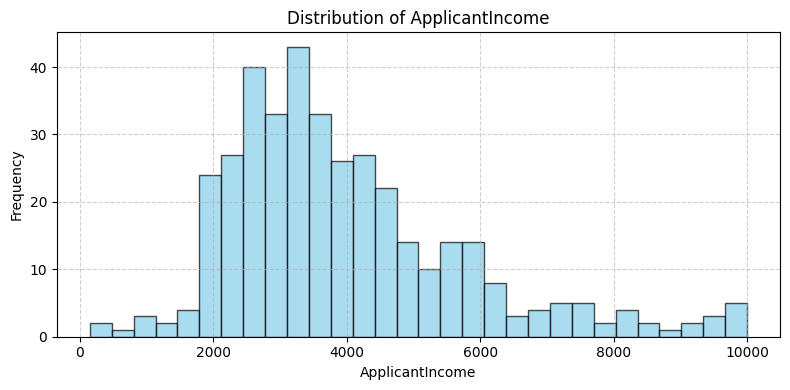

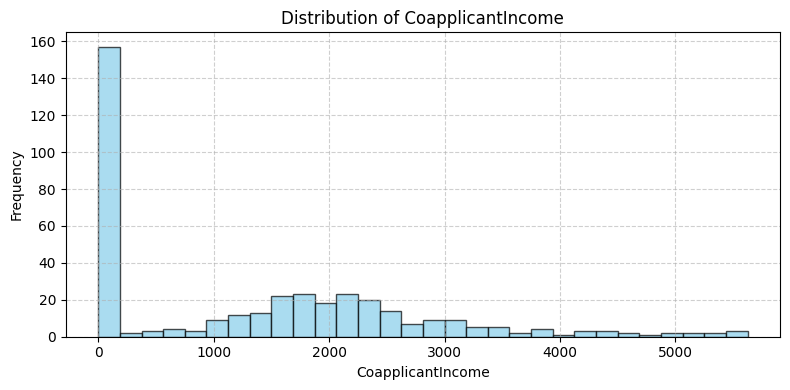

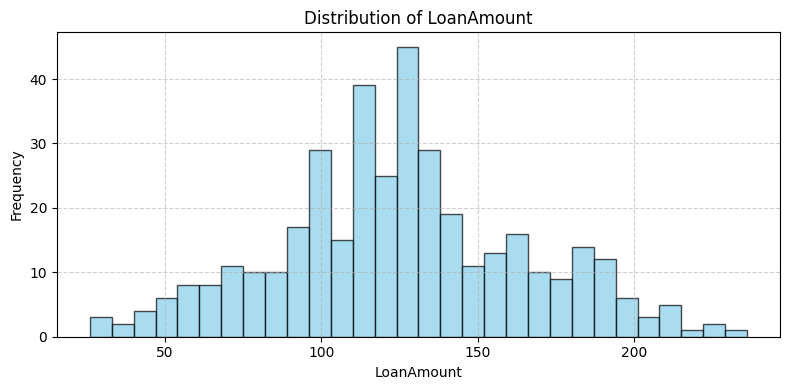

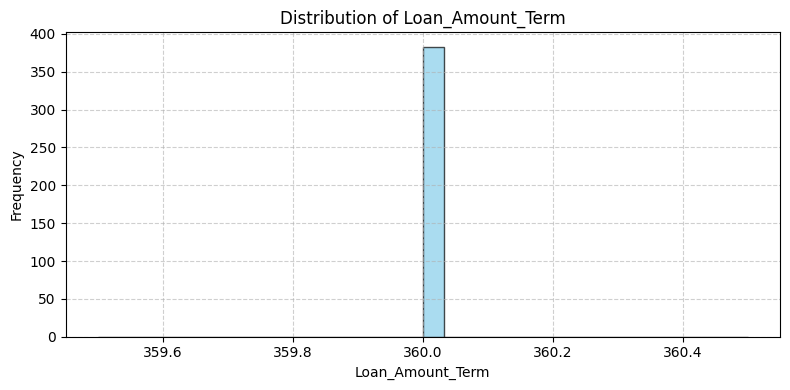

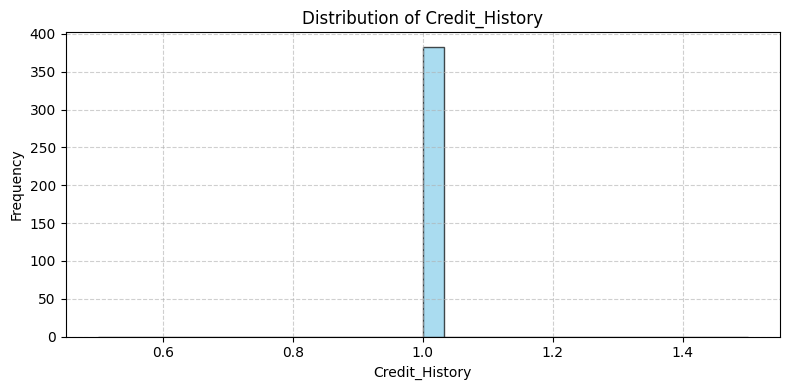

In [7]:
import matplotlib.pyplot as plt
data = data
# List of numerical features
numerical_features = ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'Credit_History']

# Plot histograms for each feature
for feature in numerical_features:
    plt.figure(figsize=(8, 4))
    plt.hist(data[feature].dropna(), bins=30, color='skyblue', edgecolor='black', alpha=0.7)
    plt.title(f'Distribution of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Frequency')
    plt.grid(True, linestyle='--', alpha=0.6)
    plt.tight_layout()
    plt.show()


## Scale Numerical Features Using StandardScaler

In [8]:
#Create an instance of StandardScaler
scaler = StandardScaler()

#Fit the scaler on the numerical features
scaler.fit(data[numerical_features])

#Transform the numerical features
data[numerical_features] = scaler.transform(data[numerical_features])

# Display scaled data
data_head = data[numerical_features].head()
data_head

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
0,1.033966,-0.969937,0.077480,0.0,0.0
1,0.331392,0.119523,0.077480,0.0,0.0
2,-0.547102,-0.969937,-1.488350,0.0,0.0
3,-0.778518,0.733609,-0.124562,0.0,0.0
4,1.117764,-0.969937,0.405800,0.0,0.0


## 3: Model Building and Evaluation

In [9]:
from sklearn.model_selection import train_test_split

numerical_features = ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'Credit_History']

#Define features (X) and target (y)
X = data[numerical_features]
y = data['Loan_Status']

# Split the data (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Display the shapes of the splits
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)


X_train shape: (306, 5)
X_test shape: (77, 5)
y_train shape: (306,)
y_test shape: (77,)


## Train Logistic Regression Model¶

In [10]:
from sklearn.linear_model import LogisticRegression

# Create logistic regression model
logreg = LogisticRegression(random_state=42)

# Train the model
logreg.fit(X_train, y_train)


LogisticRegression(random_state=42)

## Predict on Both Training and Testing Sets

In [11]:

y_train_pred = logreg.predict(X_train)

y_test_pred = logreg.predict(X_test)


## Calculate Metrics for Both Training and Testing Sets

In [12]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# Training set metrics
train_accuracy = accuracy_score(y_train, y_train_pred)
train_precision = precision_score(y_train, y_train_pred, pos_label='Y')
train_recall = recall_score(y_train, y_train_pred, pos_label='Y')
train_f1 = f1_score(y_train, y_train_pred, pos_label='Y')
train_roc_auc = roc_auc_score(y_train, [1 if i == 'Y' else 0 for i in y_train_pred])

# Testing set metrics
test_accuracy = accuracy_score(y_test, y_test_pred)
test_precision = precision_score(y_test, y_test_pred, pos_label='Y')
test_recall = recall_score(y_test, y_test_pred, pos_label='Y')
test_f1 = f1_score(y_test, y_test_pred, pos_label='Y')
test_roc_auc = roc_auc_score(y_test, [1 if i == 'Y' else 0 for i in y_test_pred])

# Display metrics
print("Training Set Metrics:")
print(f"Accuracy: {train_accuracy:.4f}")
print(f"Precision: {train_precision:.4f}")
print(f"Recall: {train_recall:.4f}")
print(f"F1 Score: {train_f1:.4f}")
print(f"ROC-AUC: {train_roc_auc:.4f}")

print("\nTesting Set Metrics:")
print(f"Accuracy: {test_accuracy:.4f}")
print(f"Precision: {test_precision:.4f}")
print(f"Recall: {test_recall:.4f}")
print(f"F1 Score: {test_f1:.4f}")
print(f"ROC-AUC: {test_roc_auc:.4f}")


Training Set Metrics:
Accuracy: 0.8203
Precision: 0.8203
Recall: 1.0000
F1 Score: 0.9013
ROC-AUC: 0.5000

Testing Set Metrics:
Accuracy: 0.8052
Precision: 0.8052
Recall: 1.0000
F1 Score: 0.8921
ROC-AUC: 0.5000


## Calculate and Plot ROC-AUC for Both Training and Testing Sets¶

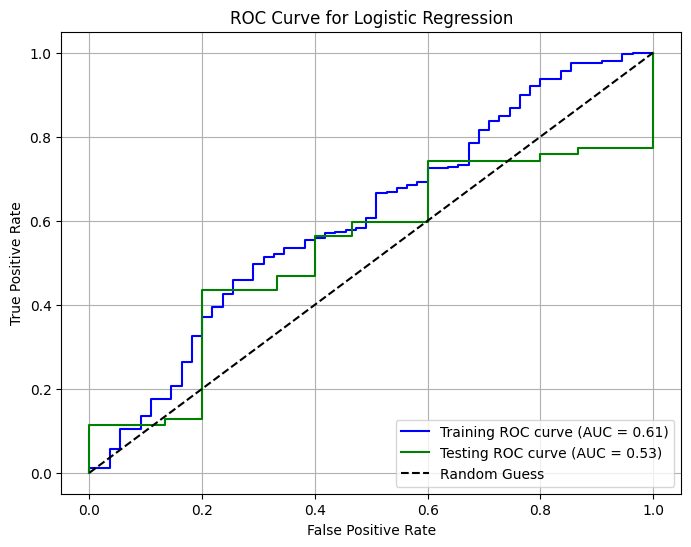

In [13]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

#Create and train the model
model = LogisticRegression()
model.fit(X_train, y_train)

# Predict probabilities for class 'Y'
y_train_proba = model.predict_proba(X_train)[:, 1]  # Probability for class 'Y'
y_test_proba = model.predict_proba(X_test)[:, 1]

# Compute ROC curve values
train_fpr, train_tpr, train_thresholds = roc_curve(y_train, y_train_proba, pos_label='Y')
test_fpr, test_tpr, test_thresholds = roc_curve(y_test, y_test_proba, pos_label='Y')

# Compute AUC
train_roc_auc = auc(train_fpr, train_tpr)
test_roc_auc = auc(test_fpr, test_tpr)

# Plot ROC curves
plt.figure(figsize=(8, 6))
plt.plot(train_fpr, train_tpr, label=f'Training ROC curve (AUC = {train_roc_auc:.2f})', color='blue')
plt.plot(test_fpr, test_tpr, label=f'Testing ROC curve (AUC = {test_roc_auc:.2f})', color='green')
plt.plot([0, 1], [0, 1], 'k--', label='Random Guess')

# Formatting the plot
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Logistic Regression')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()


## 4: Metrics Compilation

## Compile Metrics into a Summary Table

In [14]:
import pandas as pd

# Create a summary table
metrics_summary = pd.DataFrame({
    'Metric': ['Accuracy', 'Precision', 'Recall', 'F1 Score', 'ROC-AUC'],
    'Train': [train_accuracy, train_precision, train_recall, train_f1, train_roc_auc],
    'Test': [test_accuracy, test_precision, test_recall, test_f1, test_roc_auc]
})

# Display the summary table
metrics_summary


,Metric,Train,Test
0,Accuracy,0.820261,0.805195
1,Precision,0.820261,0.805195
2,Recall,1.000000,1.000000
3,F1 Score,0.901257,0.892086
4,ROC-AUC,0.605288,0.532258
